# Torch.nn

La idea ahora es armar un perceptrón multicapa pero con herrameintas de redes neuronales.

vamos a usar pytorch torch.nn.Sequential básicamente es un modelo ya armado al que le paso parámetros. de 

El primer parámetro que le metemos es torch.nn.Linear(N,H) que me dice que quiero trasnformar de tamaño N a tamaño H (No confundir con la función de activación Lineal)

El segundo parámetro es la función de activación que voy a usar torch.nn.Tanh()

Guarda!!! las mayusculas importan ya que tambien existe torch.tanh()

El tercer parámetro me dice que voy de dimesion H a M con funcion de activación el cuarto párametro


Este modelo entra con N tiene una capa interna de H y devuelve M

Este es el modelo perceptrón multicapa con aplicado al problema de la paridad de 8 bits.

La idea es ver como se simplifica el codigo al implementar la libreria torch.nn

In [1]:
import torch.nn
import matplotlib.pyplot as plt

In [2]:
P=100
N=8              #Seria el equivalente al caso de 8 bits
H=N+1
M=1              #Una sola capa
x=torch.randn(P,N).sign()         #Generamos 1 y -1 al azar
z=torch.prod(x,dim=1).view(P,1)    #Esta orientado en la coordenada 1, y especificamos que es de Px1
                  #Con prod estoy multiplicando todos los elementos de cada fila y lo pongo en un vector columna
    
bs=10                                   #Numero de datos en cada miniBatch    
lr=1e-2                                 #Learning rate

E,t=1.0,0                              #Condiciones iniciales


E_list = list()                      #Creo listas para graficar el error
t_list =list()

E_list.append(E)
t_list.append(t)

In [3]:
model=torch.nn.Sequential(
    torch.nn.Linear(N,H),     #capa 1
    torch.nn.Tanh(),          #Función de acticavion de la capa 1
    torch.nn.Linear(H,M),     #capa 2
    torch.nn.Tanh())          #funcion de activacion de la capa 2

In [4]:
costf=torch.nn.MSELoss(reduction='sum')    #Esto me especifica la función de costo

In [5]:
y=model(x)                              #Esto me devuelve el resultado de la red

In [6]:
model.zero_grad()                #Esto me resetea los gradientes

In [7]:
error=costf(y,z)                #De esta forma se calcula el error del modelo

In [8]:
error.backward()

In [9]:
while E>1E-3 and t<1000:
    rp=torch.randperm(P)
    for mb in range(0,P,bs):
        i=rp[mb:mb+bs]
        y=model(x)                              #Esto me devuelve el resultado de la red    
        error=costf(y,z)                #De esta forma se calcula el error del modelo    
        model.zero_grad()                #El reseteo de los gradientes va antes del error.backward
        error.backward()       #hace la retropropagacion y calcula el error
        with torch.no_grad():  #Todo lo que haga aca no va a parar al grafo de computos
            for param in model.parameters():             #Estoy iterando sobre los parametros del modelo
                param-=lr*param.grad
    E_list.append(E)    
    t_list.append(t)
    E=error.item()/P     #Esto me devuelve el error escalar  Esta promediado
    t+=1
    if t%100==0:
        print(t,E)
print(t,E)

100 0.08051089286804199
200 0.08022015571594238
300 0.08013636589050294
400 0.08009725570678711
500 0.08007488250732422
600 0.08006053924560547
700 0.08005064010620117
800 0.08004340171813965
900 0.08003791809082031
1000 0.08003361701965332
1000 0.08003361701965332


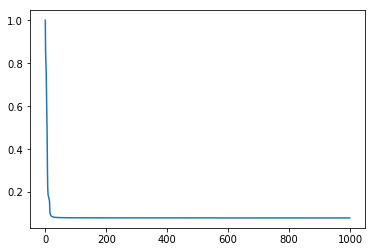

In [10]:
plt.plot(t_list,E_list)
plt.show()